In [1]:
load('interval_signals.py')

In [2]:
from flowstar.reachability import Poly, Reach, set_precision

In [3]:
set_precision(53)

In [4]:
varsd = [b't', b'x', b'y']
qt = Poly(1, 't', 0, varsd)
qx = Poly(-1, 'y', 1, varsd)
qy = Poly(1, 'x', 1, varsd)
print "t' = {}\nx' = {}\ny' = {}".format(qt, qx, qy)

D = Reach(
    varsd,
    [qt, qx, qy],
    [(0,0), (4,5), (1,2)],
    10,
    0.75,
    order=10,
    precondition=1,
    estimation=1e-1,
    cutoff_threshold=1e-20,
)

t' = (([1.0000000000e+00 , 1.0000000000e+00]))
x' = (([-1.0000000000e+00 , -1.0000000000e+00] * y))
y' = (([1.0000000000e+00 , 1.0000000000e+00] * x))


In [5]:
D.res

2

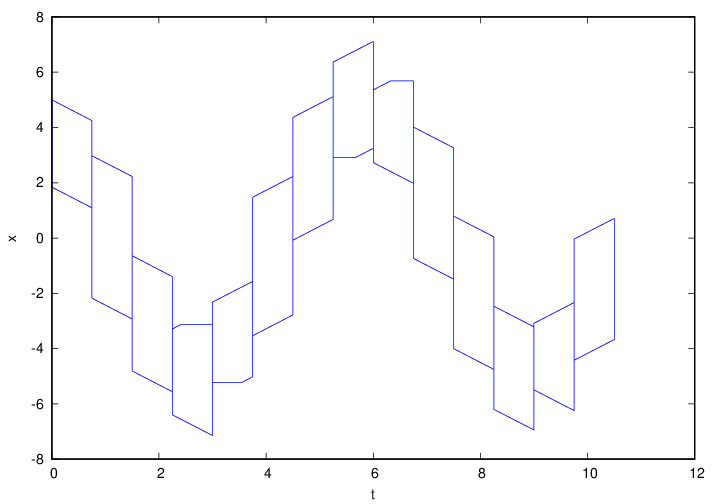

In [6]:
D.wplot('t', 'x')

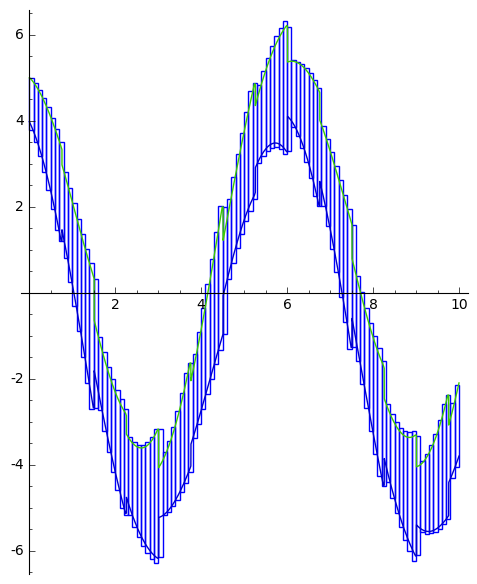

In [7]:
D.sage_plot('x') + D.sage_interval_plot('t','x')

In [8]:
def f(v, x):
    x = RIF(x)
    res = D(x)
    return RIF(res[varsd.index(v)])

In [9]:
from functools import partial

In [10]:
p1 = D.sage_plot('x')

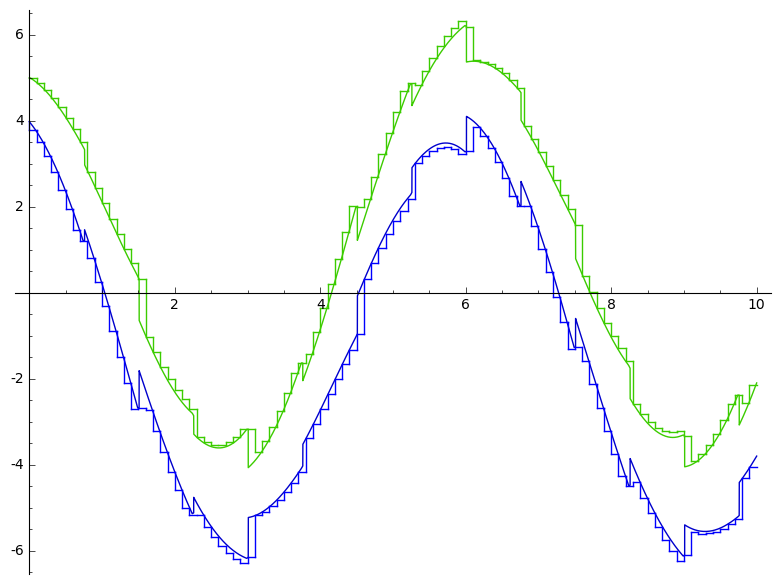

In [11]:
p1 + D.sage_plot_manual('x')

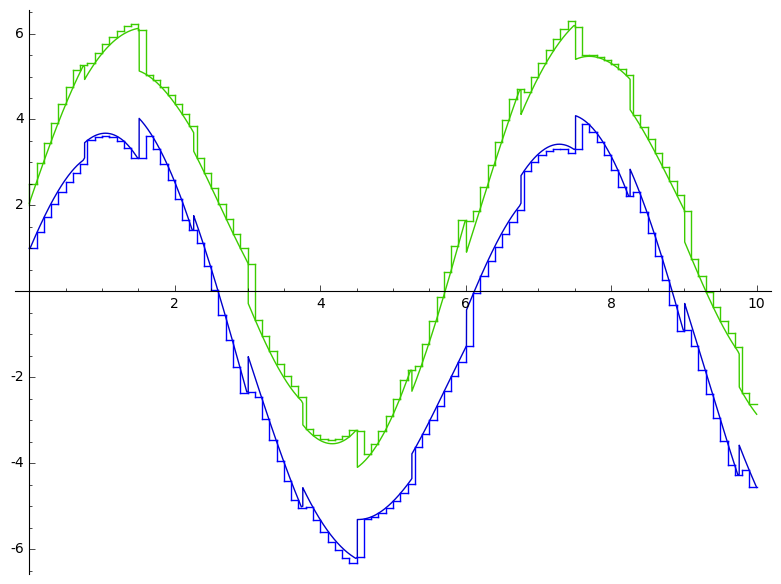

In [12]:
D.sage_plot('y') \
 + D.sage_plot_manual('y')

$x' = - y$

In [13]:
p2 = plot([(lambda t: -f('y', t).upper()),
          (lambda t: -f('y', t).lower())], (0, 10))

Will not work -- signal is discontinuous

In [14]:
sig = to_signal((lambda t: f('x', t)),
                (lambda t: -f('y', t)),
                RIF(0, 10))
sig

  I  = [0.00000000000000000 .. 1.0471492695953231]
f(I) = [-0.015529917726750970 .. 5.0000004358456458]
  I  = [1.4104643122606348 .. 1.4114643122606350]
f(I) = [-2.1365621637226667 .. 0.60594401500898621]
  I  = [1.5140032130684590 .. 4.1662548778533024]
f(I) = [-7.1436637695751868 .. 0.039521965933746011]
  I  = [4.1662558778533025 .. 4.1672558778533029]
f(I) = [-2.1110109011556620 .. 0.0057804291672760456]
  I  = [4.5186109239559035 .. 7.2874631549297098]
f(I) = [-0.077341160586683278 .. 7.1152626399656907]


Signal([0.00000000000000000 .. 10.000000000000000], [([0.00000000000000000 .. 1.0471492695953231], True), ([1.4104643122606348 .. 1.4114643122606350], False), ([1.5140032130684590 .. 4.1662548778533024], False), ([4.1662558778533025 .. 4.1672558778533029], False), ([4.5186109239559035 .. 7.2874631549297098], True), ([7.6980956095104353 .. 10.000000000000000], False)])

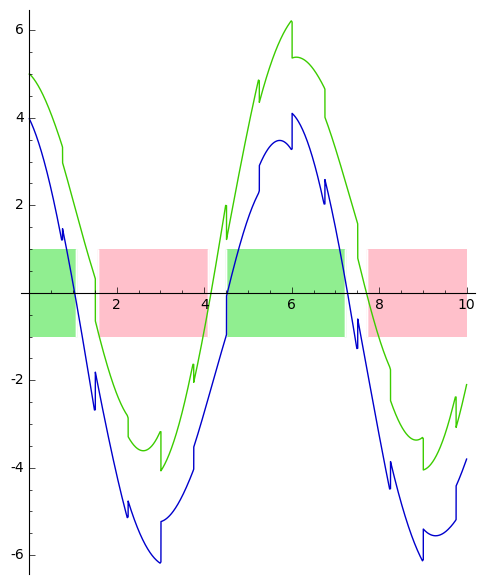

In [18]:
sig.plot() + p1

In [19]:
sig = to_signal_bisection((lambda t: f('x', t)), RIF(0, 10), 0.1)

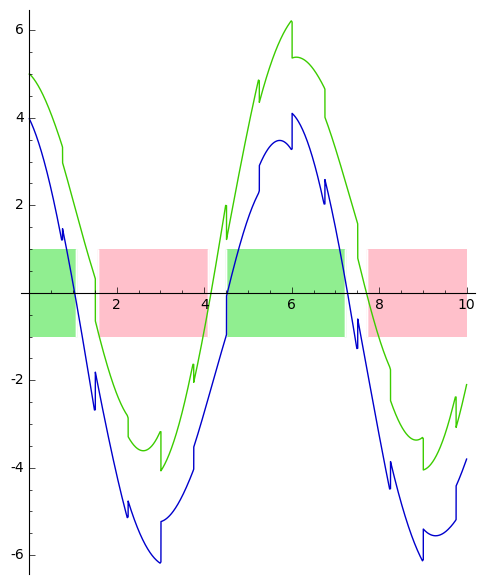

In [20]:
sig.plot() + p1

In [21]:
load('interval_root_isolation.py')

In [22]:
roots = list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(0,1.5)))
roots

[2.?]

In [23]:
roots += list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(1.5,2)))
roots

[2.?, 1.500001?]

In [24]:
lo, hi = RIF(0,2).lower(), RIF(0,2).upper(); lo, hi

(0.000000000000000, 2.00000000000000)

In [25]:
f('x', RIF(1.5,2)).str(style='brackets')

'[-4.2765187144268513 .. 0.31808372648673178]'

In [26]:
roots[0].str(style='brackets')

'[1.0471490191358754 .. 1.5000000000000000]'

In [27]:
roots[1].str(style='brackets')

'[1.5000000000000000 .. 1.5000010000000002]'

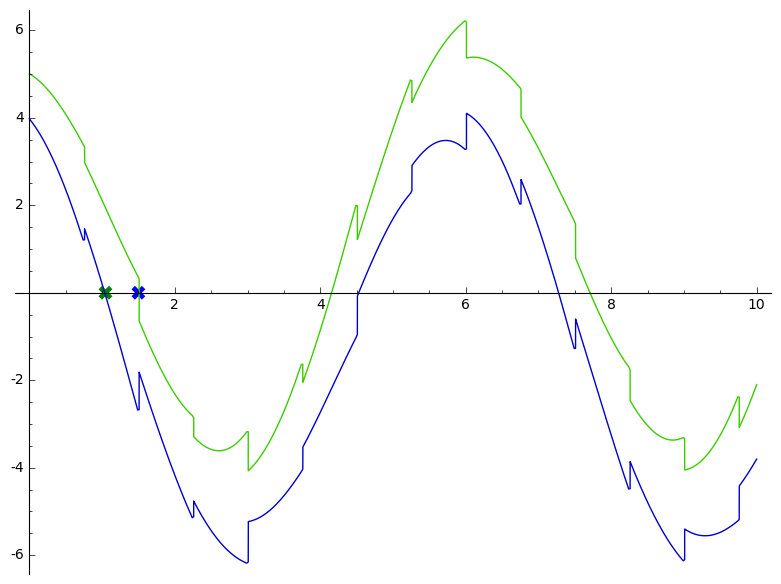

In [28]:
  p1 \
+ point((roots[0].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[1].upper(), 0), size=100, marker='X')

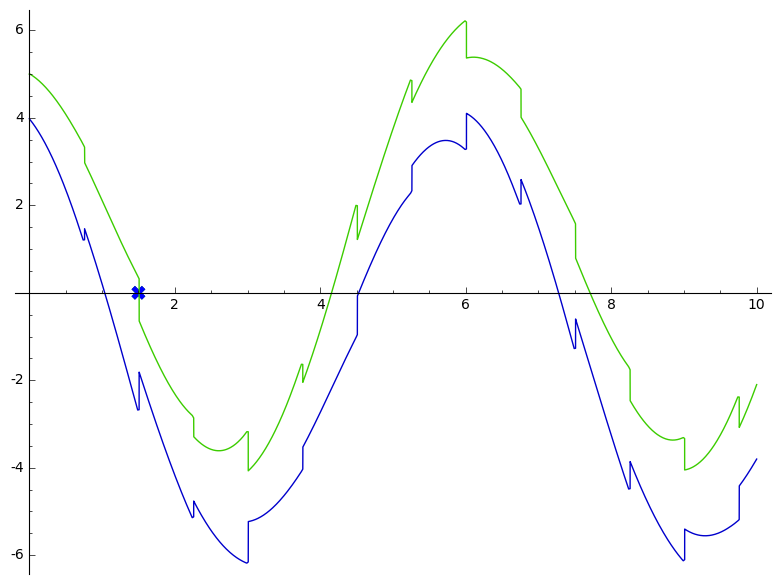

In [29]:
  p1 \
+ point((roots[1].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[1].upper(), 0), size=100, marker='X')

In [30]:
sig = Signal(RIF(0), [])
step = 0.75
for i in range(10/step):
    sig = sig.union(to_signal((lambda t: f('x', t)),
                              (lambda t: -f('y', t)),
                              RIF(step*i, step*(i+1))))
sig

  I  = [0.75000000000000000 .. 1.0471493894806141]
f(I) = [-0.015530607801751001 .. 3.3286422038477306]
  I  = [3.7500000000000000 .. 4.1662557181795146]
f(I) = [-4.0324657070275550 .. 0.039526981690329859]
  I  = [6.7500000000000000 .. 7.2874626322614518]
f(I) = [-0.077337923106332363 .. 4.6556018289478410]


Signal([0.00000000000000000 .. 9.7500000000000000], [([0.00000000000000000 .. 1.0471493894806141], True), ([1.5000010000000001 .. 4.1662557181795146], False), ([4.5186172588390318 .. 7.2874626322614518], True), ([7.6980931689288043 .. 9.7500000000000000], False)])

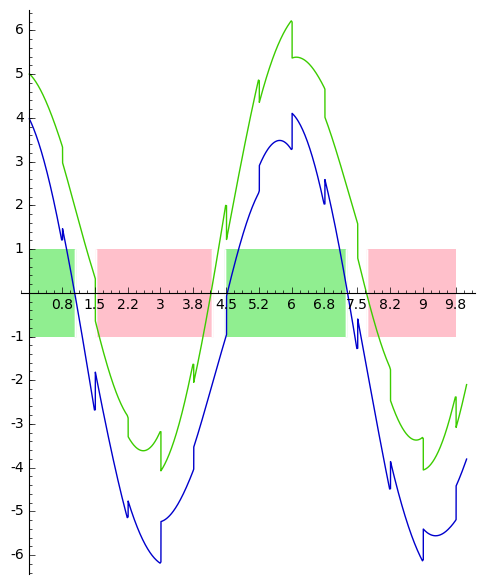

In [31]:
(sig.plot() + p1).show(ticks=[0.75, 1])

In [32]:
sig1 = Signal(RIF(0), [])
step = 0.75
for i in range(10/step):
    sig1 = sig1.union(to_signal_bisection((lambda t: f('x', t)),
                                          RIF(step*i, step*(i+1))))
sig1

Signal([0.00000000000000000 .. 9.7500000000000000], [([0.00000000000000000 .. 1.0312500000000000], True), ([1.5937500000000000 .. 4.1250000000000000], False), ([4.5937500000000000 .. 7.2187500000000000], True), ([7.7812500000000000 .. 9.7500000000000000], False)])

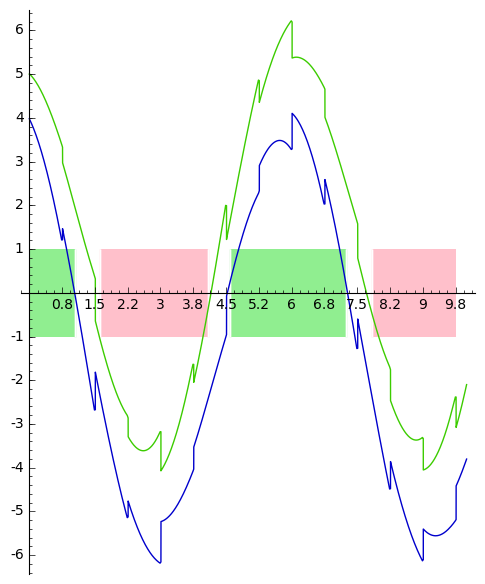

In [33]:
(sig1.plot() + p1).show(ticks=[0.75, 1])

In [34]:
def to_signal_piecewise(f, fprime, time, step):
    sig = Signal(RIF(0), [])
    for i in range(time/step):
        sig = sig.union(to_signal(f, fprime, RIF(step*i, step*(i+1))))
    return sig

  I  = [0.75000000000000000 .. 1.1140046884892570]
f(I) = [-0.40701084476921829 .. 3.3286422038477306]
  I  = [3.7500000000000000 .. 4.1821739492578783]
f(I) = [-4.0324657070275550 .. 0.13498746428718711]
  I  = [6.7500000000000000 .. 7.3973180974385163]
f(I) = [-0.78202482088190029 .. 4.6556018289478410]
  I  = [7.6550805790246796 .. 7.6560805790246800]
f(I) = [-1.3368808424259995 .. 0.16896504836697940]


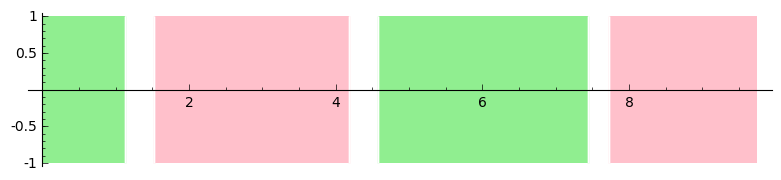

In [35]:
to_signal_piecewise((lambda t: f('x', t)), (lambda t: -f('x', t)),
                    10, 0.75).plot()

In [36]:
load('interval_signals.py')

/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


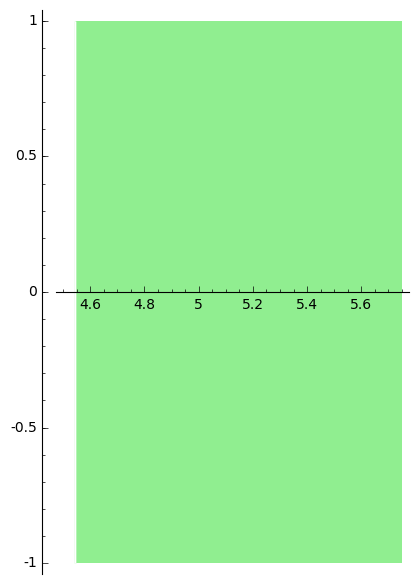

In [37]:
to_signal((lambda t: f('x', t)), (lambda t: -f('x', t)),
          RIF(4.5,5.75)).plot()

## Contexts

In [38]:
varsc = [b't', b'x']
pt = Poly(1, 't', 0, varsc)
px = Poly(-1, 'x', 1, varsc)
print "t' = {}\nx' = {}".format(pt, px)

t' = (([1.0000000000e+00 , 1.0000000000e+00]))
x' = (([-1.0000000000e+00 , -1.0000000000e+00] * x))


In [39]:
C0 = Reach(
    varsc,
    [pt, px],
    [(0,0), (4.5,5)],
    5,
    0.7,
    order=10,
)

In [40]:
C1 = Reach(
    varsc,
    [pt, px],
    [(0,0), (4.5,5)],
    1,
    0.7,
    order=10,
)

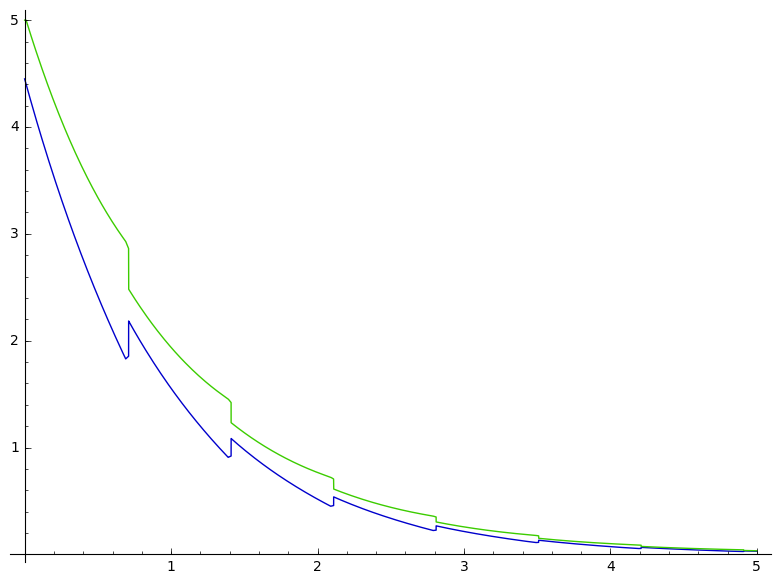

In [41]:
C0.sage_plot('x')

In [42]:
C1((1.0,1.0))

[1, 2.?]

In [43]:
C2 = Reach(
    varsc,
    [pt, px],
    [(RIF(x) + RIF(1.5,2) if i == 1 else x) for i, x in enumerate(C1((1.0,1.0)))],
    4,
    0.7,
    order=10,
)

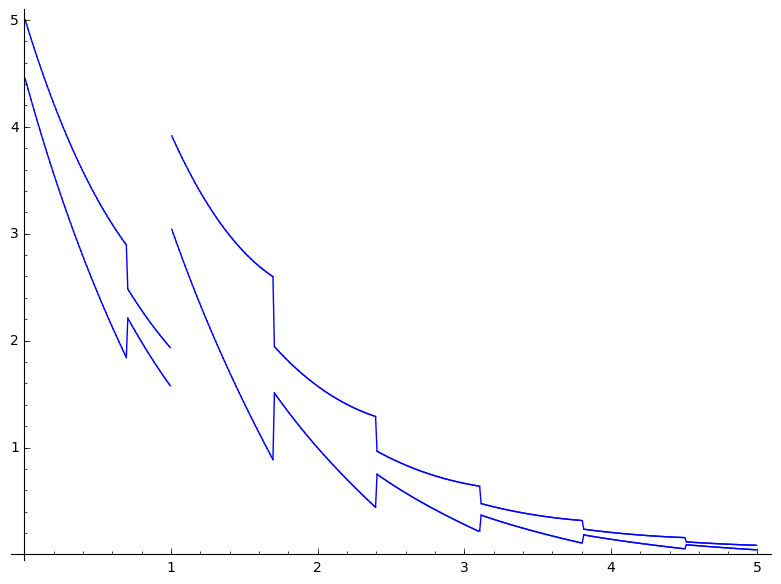

In [44]:
C1.sage_time_tube_plot('x',0.01,joins=False)\
 + C2.sage_time_tube_plot('x',0.01,joins=False)

In [45]:
load('interval_signals.py')

In [46]:
def rifify(f):
    return lambda t: [RIF(x) for x in f(t)]

In [47]:
def continuation(xs):
    print xs
    return rifify(Reach(
        varsc,
        [pt, px],
        xs,
        5,
        0.5,
        order=10,
    ))

In [48]:
sig = ctx(
    I=RIF(0,5),
    C=(lambda xs: [x + RIF(1.5,2) if i == 1 else x
                        for i, x in enumerate(xs)]),
    phi=(lambda f: None if 4 in f(0)[1] else f(0)[1] < 4),
    f=rifify(C0),
    g=continuation,
    epsilon=0.1,
)
sig

[1.?e1, 1.?e1]
bisecting [0.00000000000000000 .. 5.0000000000000000] -> [0.00000000000000000 .. 2.5000000000000000], [2.5000000000000000 .. 5.0000000000000000]
[1.?e1, 1.?e1]
bisecting [0.00000000000000000 .. 2.5000000000000000] -> [0.00000000000000000 .. 1.2500000000000000], [1.2500000000000000 .. 2.5000000000000000]
[1.?, 1.?e1]
bisecting [0.00000000000000000 .. 1.2500000000000000] -> [0.00000000000000000 .. 0.62500000000000000], [0.62500000000000000 .. 1.2500000000000000]
[1.?, 1.?e1]
bisecting [0.00000000000000000 .. 0.62500000000000000] -> [0.00000000000000000 .. 0.31250000000000000], [0.31250000000000000 .. 0.62500000000000000]
[1.?, 1.?e1]
[1.?, 1.?e1]
bisecting [0.31250000000000000 .. 0.62500000000000000] -> [0.31250000000000000 .. 0.46875000000000000], [0.46875000000000000 .. 0.62500000000000000]
[0.4?, 1.?e1]
bisecting [0.31250000000000000 .. 0.46875000000000000] -> [0.31250000000000000 .. 0.39062500000000000], [0.39062500000000000 .. 0.46875000000000000]
[0.4?, 5.?]
[0.4?, 5

Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 0.46875000000000000], False), ([1.0156250000000000 .. 5.0000000000000000], True)])

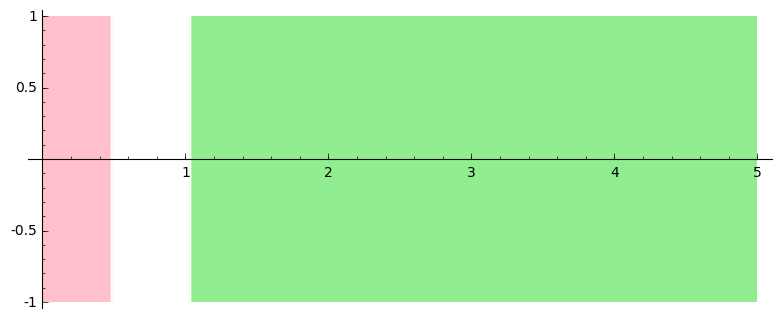

In [49]:
sig.plot()

In [50]:
phi = lambda f: to_signal(lambda t: f(t)[1] - 2,
                          lambda t: -f(t)[1],
                          RIF(0,1)
                          ).G(RIF(0,0.2))(0)

sig = ctx(
    I=RIF(0,5),
    C=(lambda xs: [x + RIF(1.5,2) if i == 1 else x
                        for i, x in enumerate(xs)]),
    phi=phi,
    f=rifify(C0),
    g=continuation,
    epsilon=0.1,
)
sig

[1.?e1, 1.?e1]
bisecting [0.00000000000000000 .. 5.0000000000000000] -> [0.00000000000000000 .. 2.5000000000000000], [2.5000000000000000 .. 5.0000000000000000]
[1.?e1, 1.?e1]
bisecting [0.00000000000000000 .. 2.5000000000000000] -> [0.00000000000000000 .. 1.2500000000000000], [1.2500000000000000 .. 2.5000000000000000]
[1.?, 1.?e1]
  I  = [0.00000000000000000 .. 0.053171106057927256]
f(I) = [-0.0031737587804041568 .. 5.0000001152521226]
bisecting [0.00000000000000000 .. 1.2500000000000000] -> [0.00000000000000000 .. 0.62500000000000000], [0.62500000000000000 .. 1.2500000000000000]
[1.?, 1.?e1]
  I  = [0.00000000000000000 .. 0.12802019405901427]
f(I) = [-0.021141501084379178 .. 5.0000001139131625]
bisecting [0.00000000000000000 .. 0.62500000000000000] -> [0.00000000000000000 .. 0.31250000000000000], [0.31250000000000000 .. 0.62500000000000000]
[1.?, 1.?e1]
  I  = [0.00000000000000000 .. 0.38645222622453513]
f(I) = [-0.26766574854336356 .. 5.0000001097187275]
  I  = [0.50350854485653318 .

bisecting [2.3437500000000000 .. 2.5000000000000000] -> [2.3437500000000000 .. 2.4218750000000000], [2.4218750000000000 .. 2.5000000000000000]
[2.4?, 2.?]
[2.5?, 2.?]
[1.?e1, 2.?]
bisecting [2.5000000000000000 .. 5.0000000000000000] -> [2.5000000000000000 .. 3.7500000000000000], [3.7500000000000000 .. 5.0000000000000000]
[3.?, 2.?]
bisecting [2.5000000000000000 .. 3.7500000000000000] -> [2.5000000000000000 .. 3.1250000000000000], [3.1250000000000000 .. 3.7500000000000000]
[3.?, 2.?]
bisecting [2.5000000000000000 .. 3.1250000000000000] -> [2.5000000000000000 .. 2.8125000000000000], [2.8125000000000000 .. 3.1250000000000000]
[3.?, 2.?]
bisecting [2.5000000000000000 .. 2.8125000000000000] -> [2.5000000000000000 .. 2.6562500000000000], [2.6562500000000000 .. 2.8125000000000000]
[3.?, 2.?]
bisecting [2.5000000000000000 .. 2.6562500000000000] -> [2.5000000000000000 .. 2.5781250000000000], [2.5781250000000000 .. 2.6562500000000000]
[2.5?, 2.?]
[2.6?, 2.?]
[3.?, 2.?]
bisecting [2.6562500000000

Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 1.1718750000000000], True), ([2.8125000000000000 .. 5.0000000000000000], False)])

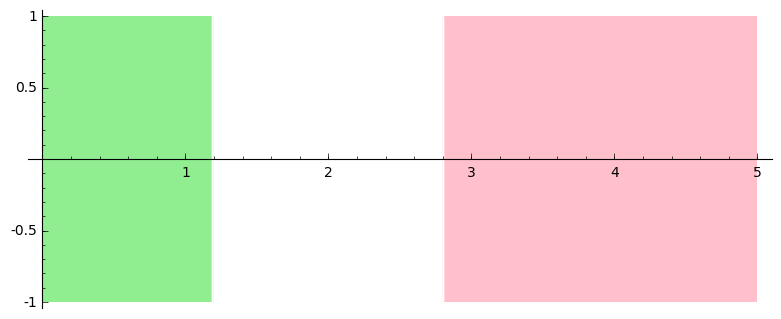

In [51]:
sig.plot()